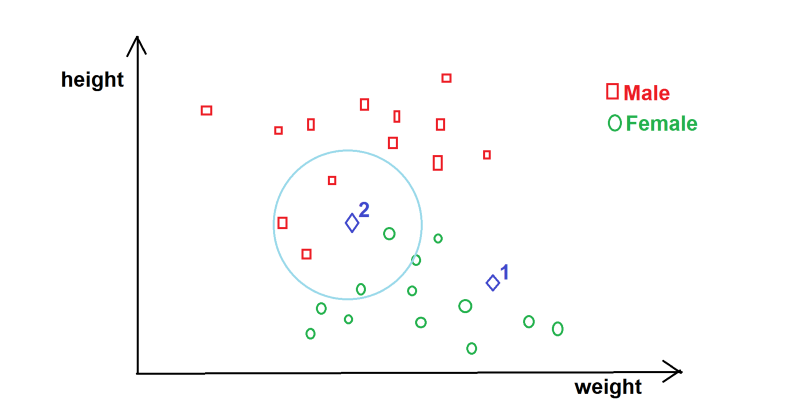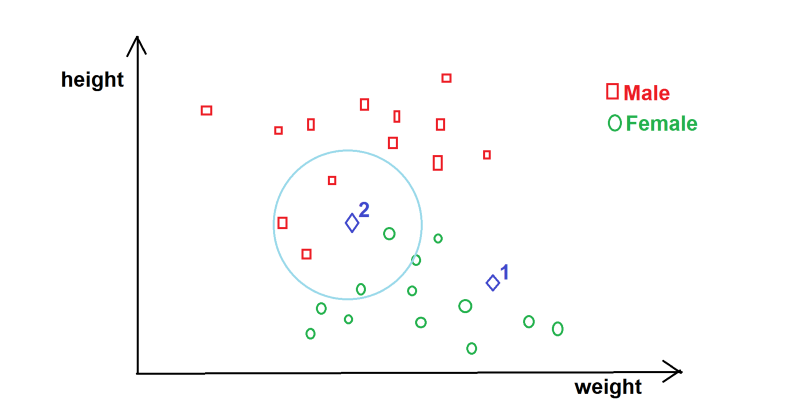

In [2]:
import numpy as np
from collections import Counter

In [4]:
s="aabbcbdabacbc"
c=Counter(s)
print(c)

Counter({'b': 5, 'a': 4, 'c': 3, 'd': 1})


In [6]:
data={"male": [[6.3,50.2],[5.6,47.1]],
    "female": [[5.9,79.7],[5.1,61.4],[5.1,59.8]]}


In [7]:
def predict(input_feature_set,k):
    distances=[]

    for group in data:
        for training_feature_set in data[group]:
            euclidean_distance= np.linalg.norm(np.array(input_feature_set)- np.array(training_feature_set))
            distances.append([euclidean_distance,group])
        nearest = sorted(distances)[:k]
        votes=[d[1] for d in nearest]
        prediction = Counter(votes).most_common(1)[0][0]

        return prediction

In [9]:
print(predict([6.0, 52.1], 3))

male


accuracy = correct_predictions / test_sample_size * 100

# Phân loại hoa dựa trên IRIS

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
data=pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
data=data.drop(columns="Id",axis=1)

In [23]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


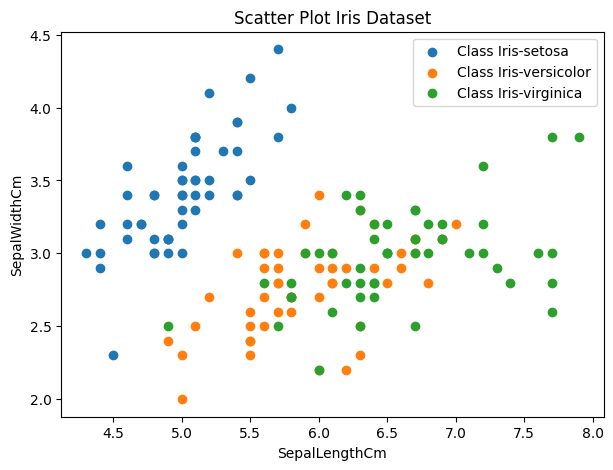

In [31]:
plt.figure(figsize=(7,5))
for s in data["Species"].unique():
    subset=data[data["Species"]==s]
    plt.scatter(
        subset["SepalLengthCm"],
        subset["SepalWidthCm"],
        label=f"Class {s}"
    )
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.title("Scatter Plot Iris Dataset")
plt.legend()
plt.show()

In [38]:
class K_Nearest_Neighbors:
    def __init__(self, data_set, k):
        self.ds = data_set
        self.k = k

    def predict(self, feature_set):
        distances = []
        for group in self.ds:
            for feature in self.ds[group]:
                e_d = np.linalg.norm(np.array(feature_set) - np.array(feature))
                distances.append([e_d, group])
        nearest = sorted(distances, key=lambda x: x[0])[:self.k]
        votes = [d[1] for d in nearest]
        nearest_group = Counter(votes).most_common(1)[0]
        feature_set_group, self.confidence = nearest_group[0], nearest_group[1] / self.k
        return feature_set_group

    def test(self, test_data):
        correct = 0
        total = 0
        for group in test_data:
            for feature_set in test_data[group]:
                group_prediction = self.predict(feature_set)
                if group_prediction == group:
                    correct += 1
                total += 1
        accuracy = correct / total
        print("Accuracy =", accuracy)

In [37]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [47]:
df=pd.read_csv("Iris.csv")
df.head()
df = df.drop(columns="Id",axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
features=df.iloc[:,:-1].values
labels=df.iloc[:,-1].values

scaler=MinMaxScaler()
features_scaled=scaler.fit_transform(features)


In [51]:
X_train,X_test,y_train,y_test=train_test_split(features_scaled,labels,test_size=0.2,random_state=42,stratify=labels)


In [53]:
train_data={}

for feature,label in zip(X_train,y_train):
    train_data.setdefault(label,[]).append(feature)

test_data={}
for feature,label in zip(X_test,y_test):
    test_data.setdefault(label,[]).append(feature)

knn=K_Nearest_Neighbors(train_data,k=5)
knn.test(test_data)

Accuracy = 0.9666666666666667


In [54]:
new_sample = [[5.8,2.7,5.1,1.9]]
new_sample_scaled=scaler.transform(new_sample)
predicted_class=knn.predict(new_sample_scaled[0])
print("Predicted:", predicted_class, "Confidence:", knn.confidence)


Predicted: Iris-virginica Confidence: 1.0
